# Dataset Overview

## Source
This dataset is sourced from the [kaggle.com](https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition)

## Composition
- **Total Subjects:** 500 individuals
- **Total Data Points:** Each individual's brain activity recorded for 23.6 seconds, sampled into 4097 data points.
- **File Structure:** The dataset is organized into 5 folders, each containing 100 files. Each file corresponds to a single subject.

## Data Processing
- **Chunking:** The time-series data for each subject is divided into 23 chunks.
- **Chunk Size:** Each chunk contains 178 data points, representing 1 second of EEG recording.
- **Total Records:** The chunking process results in 23 chunks per individual, culminating in 23 x 500 = 11,500 records.

## Data Format
- **Columns:** Each record contains 178 data points (X1, X2, …, X178) as explanatory variables, with an additional response variable 'y' in column 179.
- **Response Variable ('y'):** Represents the category of the EEG recording, with values:
  - 1: Recording of seizure activity
  - 2: EEG recorded from the area where a tumor was located
  - 3: EEG recorded from a healthy brain area, specifically where a tumor was identified
  - 4: EEG recorded with the patient's eyes closed
  - 5: EEG recorded with the patient's eyes open
- **Note:** All subjects in classes 2, 3, 4, and 5 are those without epileptic seizures. Only subjects in class 1 exhibit epileptic seizure activity.

## Research Context
- **Binary Classification:** While the dataset contains 5 distinct classes, most research focuses on binary classification, distinguishing class 1 (Epileptic seizure) from the other classes.

## Objective
The dataset's transformation into a .csv format aimed to simplify data access and usage, particularly for machine learning and neuroimaging research focusing on epileptic seizure detection and analysis.



---


## **Summary:**
- The original dataset consists of EEG recordings from 500 individuals, each with 4097 data points representing 23.6 seconds of brain activity.
- The data is divided into 23 chunks, each containing 178 data points for 1 second.
- The last column represents labels (y) with five categories indicating different states of brain activity.
- Classes 2-5 represent non-seizure conditions, while class 1 represents epileptic seizure. Many studies focus on binary classification, distinguishing seizure (class 1) from non-seizure (classes 2-5).

## Introduciton

The "EEG Epilepsy Recognition" project focuses on using EEG data analysis for simple classification of epileptic conditions. The main goal is to compare the effectiveness of different classification algorithms in distinguishing between normal brain activity and epilepsy-related activity. By testing and analyzing a variety of classifiers, the project aims to identify the most effective methods for this specific application, which can contribute to a better understanding and identification of EEG patterns characteristic of epilepsy.

## Dataset loading + data labeling

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [43]:
ESR = pd.read_csv("Epileptic Seizure Recognition.csv")

In [44]:
ESR.head(5)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [45]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [46]:
ESR['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [47]:
ESR['tgt'] = ESR['y'].apply(lambda x: 0 if x > 1 else 1)

In [48]:
ESR.head(5)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,tgt
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,0


In [49]:
ESR['tgt'].value_counts()

tgt
0    9200
1    2300
Name: count, dtype: int64

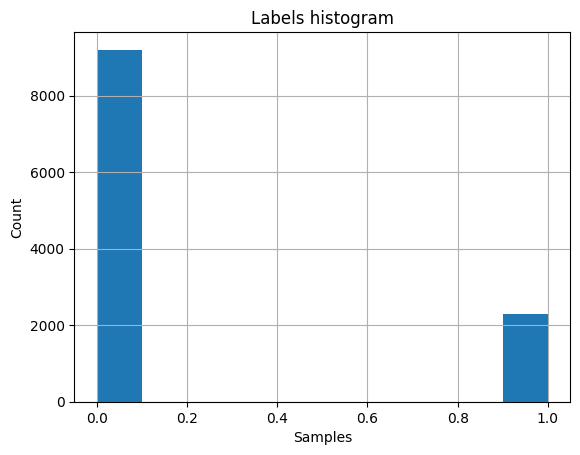

In [50]:
plt.figure()
ESR['tgt'].hist()
plt.title('Labels histogram')
plt.ylabel('Count')
plt.xlabel('Samples')
plt.show()

In [51]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

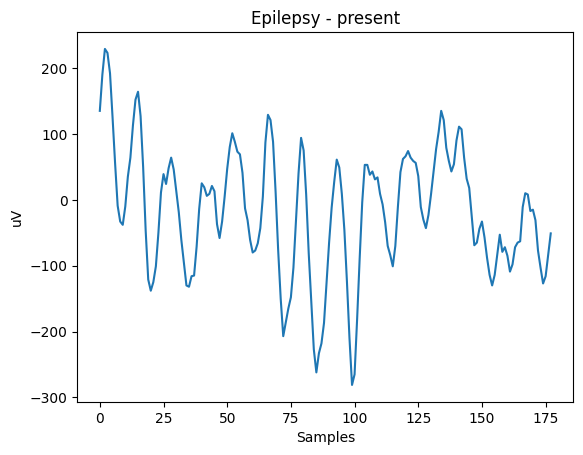

In [52]:
plt.plot(X[0,:])
plt.title('Epilepsy - present')
plt.ylabel('uV')
plt.xlabel('Samples')
plt.show()

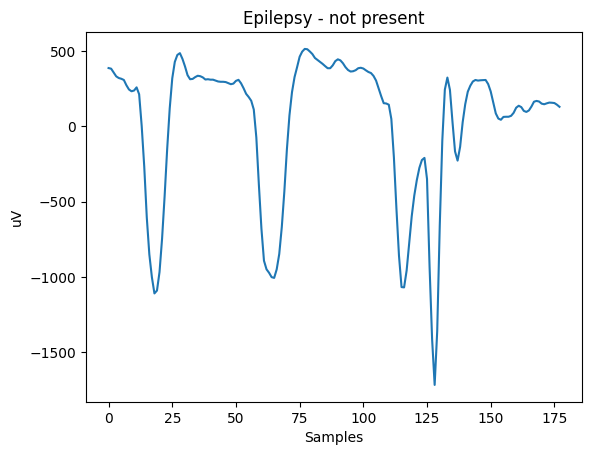

In [53]:
plt.plot(X[1,:])
plt.title('Epilepsy - not present')
plt.ylabel('uV')
plt.xlabel('Samples')
plt.show()

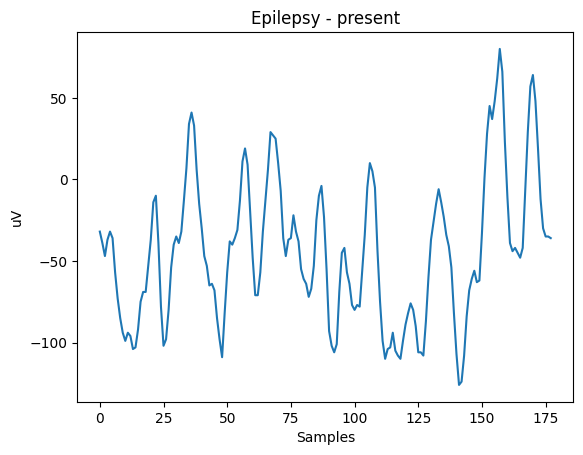

In [54]:
plt.plot(X[2,:])
plt.title('Epilepsy - present')
plt.ylabel('uV')
plt.xlabel('Samples')
plt.show()

Based on the presented figures, it can be concluded that there is a clear difference in EEG patterns between patients with epilepsy and those without the condition. Characteristic features in EEG recordings, such as amplitude, frequency and overall brain wave pattern, appear to be significantly different in cases of patients during epilepsy episode. This makes it relatively easy to distinguish cases with epilepsy from healthy controls based on EEG analysis.

## Data preparation + Features Extracion

In [55]:
import pandas as pd
import numpy as np
import scipy.stats

# 1. Mean and Median
mean_values = X.mean(axis=1)
median_values = np.median(X, axis=1)

# 2. Standard Deviation
std_deviation_values = np.std(X, axis=1)

# 3. Skewness and Kurtosis
skewness_values = scipy.stats.skew(X, axis=1)
kurtosis_values = scipy.stats.kurtosis(X, axis=1)

# 4. Minimum and Maximum
min_values = np.min(X, axis=1)
max_values = np.max(X, axis=1)

# 5. Root Mean Square (RMS)
rms_values = np.sqrt(np.mean(X**2, axis=1))

# 6. Zero Crossing Rate
zero_crossings = np.count_nonzero(np.diff(np.sign(X), axis=1) != 0, axis=1)
zero_crossing_rate = zero_crossings / X.shape[1]

# 7. Entropy
entropy_values = np.apply_along_axis(scipy.stats.entropy, axis=1, arr=X)

# 8. Energy
energy_values = np.sum(X**2, axis=1)

# Create a new DataFrame with the computed features
X_features = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Std Deviation': std_deviation_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values,
    'Min': min_values,
    'Max': max_values,
    'RMS': rms_values,
    'Zero Crossing Rate': zero_crossing_rate,
    # 'Entropy': entropy_values,
    'Energy': energy_values
})

X_features

,Mean,Median,Std Deviation,Skewness,Kurtosis,Min,Max,RMS,Zero Crossing Rate,Energy
0,-16.910112,-11.5,95.710958,-0.200327,0.067411,-281,229,97.193309,0.129213,1681484
1,28.112360,220.5,471.835823,-1.511088,1.341888,-1716,513,472.672559,0.044944,39768644
2,-44.044944,-44.5,44.186380,0.494485,-0.240414,-126,80,62.389048,0.067416,692846
3,-68.910112,-69.0,15.923723,0.367125,0.212160,-105,-22,70.726010,0.000000,890386
4,-6.651685,-1.0,38.693001,-0.462741,-0.250516,-103,78,39.260581,0.196629,274368
...,...,...,...,...,...,...,...,...,...,...
11495,5.157303,7.5,38.268536,-0.185539,-0.966425,-79,73,38.614488,0.067416,265412
11496,5.674157,27.5,163.078548,0.009039,0.523230,-388,471,163.177232,0.067416,4739572
11497,6.752809,8.5,44.164855,0.092115,-0.410145,-90,121,44.678125,0.151685,355312
11498,-38.842697,-40.0,63.428346,0.519187,0.272000,-157,148,74.376812,0.061798,984680


In [56]:
y = ESR['tgt']
y

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: tgt, Length: 11500, dtype: int64

## Modeling and Classification

### Data split (train and test)

In [57]:
from sklearn.model_selection import train_test_split
X_train_no_feat, X_test_no_feat, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle =True)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=0, shuffle =True)

### KNN Classifier Results

In [58]:
# K-Nearest Neighbors
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Create a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train_no_feat, y_train)

# Make predictions
y_pred = knn.predict(X_test_no_feat)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy (no features): {accuracy}")

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"K-Nearest Neighbors Accuracy: {accuracy2}")
print(f"K-Nearest Neighbors precision: {precision}")
print(f"K-Nearest Neighbors recall: {recall}")

print(f"Accuracy difference: {accuracy2 - accuracy}")

K-Nearest Neighbors Accuracy (no features): 0.9243478260869565
K-Nearest Neighbors Accuracy: 0.9530434782608695
K-Nearest Neighbors precision: 0.93030363509212
K-Nearest Neighbors recall: 0.9218287839980613
Accuracy difference: 0.02869565217391301


### Decision Tree Classifier Results

In [59]:
# Decision Tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train_no_feat, y_train)

# Make predictions
y_pred = clf.predict(X_test_no_feat)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (no features): {accuracy}")

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Decision Tree Accuracy: {accuracy2}")
print(f"Decision Tree precision: {precision}")
print(f"Decision Tree recall: {recall}")

print(f"Accuracy difference: {accuracy2 - accuracy}")


Decision Tree Accuracy (no features): 0.9397101449275362
Decision Tree Accuracy: 0.9698550724637681
Decision Tree precision: 0.9570704165665643
Decision Tree recall: 0.9480683924050168
Accuracy difference: 0.03014492753623188


### Random Forest Classifier Results

In [60]:
# Random Forest
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the classifier
clf.fit(X_train_no_feat, y_train)

# Make predictions
y_pred = clf.predict(X_test_no_feat)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy (no features): {accuracy}")

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Random Forest Classifier Accuracy: {accuracy2}")
print(f"Random Forest Classifier precision: {precision}")
print(f"Random Forest Classifier recall: {recall}")

print(f"Accuracy difference: {accuracy2 - accuracy}")


Random Forest Classifier Accuracy (no features): 0.9779710144927536
Random Forest Classifier Accuracy: 0.9773913043478261
Random Forest Classifier precision: 0.9690693186068325
Random Forest Classifier recall: 0.9598309754839969
Accuracy difference: -0.0005797101449275255


## Classification conclusions

Analysis of classification results in the "EEG Epilepsy Recognition" project shows that all three methods used - K-Nearest Neighbors (KNN), Decision Tree and Random Forest Classifier - achieve high accuracy. KNN and Decision Tree showed significant improvements in accuracy after using the features, with the greatest difference in accuracy for KNN. Random Forest Classifier, although it achieved the highest accuracy without features, did not show significant improvement after using them. The results indicate the effectiveness of these methods in EEG classification, with a slight advantage for Random Forest in terms of overall accuracy.

# General conclusions

The primary focus of the research has been on binary classification, distinguishing epileptic seizure (class 1) from non-seizure conditions (classes 2-5). The overarching goal of this research was to effectively distinguish between seizure and non-seizure EEG records using various classification methods. Overall, the notebook indicates a comprehensive approach towards understanding and classifying EEG data for epilepsy recognition, with a particular emphasis on binary classification to differentiate between epileptic seizures and non-seizure states. The dataset's structure and the approach to chunking and labeling the data reflect a detailed and methodical preparation for the analysis. The focus has been on utilizing this structured data to train and test various classification models to identify the most effective ones for seizure detection.

## Further research or improvement areas

Potential areas for further research:
- Deep Learning Models ((CNNs) or Recurrent Neural Networks (RNNs) could potentially improve seizure detection, given their success in similar time-series and signal processing tasks)
- Data Augmentation (Data augmentation techniques could help in creating a more robust model by simulating a wider range of seizure and non-seizure scenarios)
- Incorporation of Additional Data Sources (Integrating other types of data, such as MRI or genetic information, with EEG data could provide a more comprehensive view for seizure detection and classification)
- Interpretability and Explainability (Improving the interpretability of machine learning models in this domain could be productive)